*BIBLIOTECAS*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import (ConfusionMatrixDisplay, 
                            confusion_matrix, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            accuracy_score, 
                            classification_report)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


*IMPORTANDO BIBLIOTECA*

In [2]:
df = pd.read_csv('dataset/titanicc/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*ENTENDER OS DADOS*

In [4]:
#Quantos mortos
# Quantidade de mortos
qtd_de_mortos = (df['Survived'] == 0).sum()

# Total de passageiros
total_passageiros = len(df)

# Percentual de mortos
percentual_mortos = (qtd_de_mortos / total_passageiros) * 100

# Arredondar e formatar
percentual_mortos_formatado = f"{percentual_mortos:.2f}%"

# Exibir resultados
print(f"Quantidade de mortos: {qtd_de_mortos}")
print(f"Percentual de mortos: {percentual_mortos_formatado}")


Quantidade de mortos: 549
Percentual de mortos: 61.62%


In [5]:
#Quantos sobreviventes

# Quantidade de sobreviventes
qtd_de_vivos = (df['Survived'] == 1).sum()

# Total de passageiros
total_passageiros = len(df)

# Percentual de sobreviventes
percentual_vivos = (qtd_de_vivos / total_passageiros) * 100

# Arredondar e formatar
percentual_vivos_formatado = f"{percentual_vivos:.2f}%"

# Exibir resultados
print(f"Quantidade de sobreviventes: {qtd_de_vivos}")
print(f"Percentual de sobreviventes: {percentual_vivos_formatado}")

Quantidade de sobreviventes: 342
Percentual de sobreviventes: 38.38%


In [6]:
#Quantos Sobreviventes do Sexo Masculino e Feminino

# Agrupar por sexo e calcular sobreviventes e total
survival_stats_sex = df.groupby('Sex')['Survived'].agg(['sum', 'count'])

# Calcular o percentual de sobreviventes
survival_stats_sex['percentual_sobreviventes'] = (survival_stats_sex['sum'] / survival_stats_sex['count']) * 100

# Arredondar e formatar como string com símbolo de porcentagem
survival_stats_sex['percentual_sobreviventes'] = survival_stats_sex['percentual_sobreviventes'].round(2).astype(str) + '%'

# Exibir tudo
print(survival_stats_sex)


        sum  count percentual_sobreviventes
Sex                                        
female  233    314                    74.2%
male    109    577                   18.89%


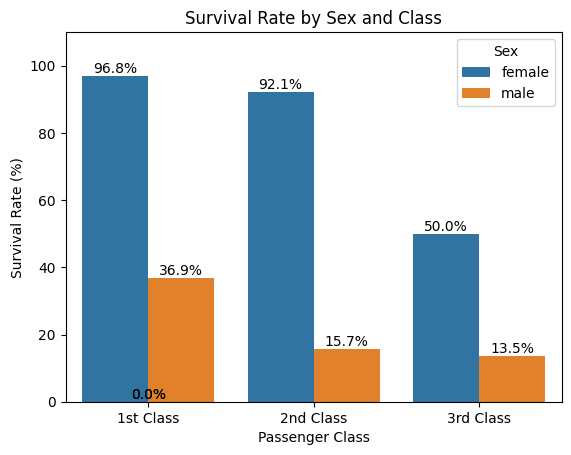

In [7]:
survival_rate = df.groupby(["Pclass", "Sex"])["Survived"].mean().reset_index()
survival_rate["Survived"] = survival_rate["Survived"] * 100  

ax = sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = survival_rate)

plt.title("Survival Rate by Sex and Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 110)
plt.xticks([0,1,2], ["1st Class", "2nd Class", "3rd Class"]) 
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2., 
        p.get_height() + 1, 
        f'{p.get_height():.1f}%', 
        ha = "center"
    )
plt.show()

In [8]:
# Agrupar por classe e calcular sobreviventes e total
survival_stats_pclass = df.groupby('Pclass')['Survived'].agg(['sum', 'count'])

# Calcular o percentual de sobreviventes
survival_stats_pclass['percentual_sobreviventes'] = (survival_stats_pclass['sum'] / survival_stats_pclass['count']) * 100

# Arredondar e formatar como string com símbolo de porcentagem
survival_stats_pclass['percentual_sobreviventes'] = survival_stats_pclass['percentual_sobreviventes'].round(2).astype(str) + '%'

# Exibir tudo: quantidade de sobreviventes, total e percentual
print(survival_stats_pclass)


        sum  count percentual_sobreviventes
Pclass                                     
1       136    216                   62.96%
2        87    184                   47.28%
3       119    491                   24.24%


In [9]:
#Sobreviventes por embarque

grouped = df.groupby('Embarked')['Survived'].agg(['sum', 'count'])

# Calcular percentual de sobreviventes
grouped['percentual_sobreviventes'] = (grouped['sum'] / grouped['count']) * 100

# Formatando como string percentual
grouped['percentual_formatado'] = grouped['percentual_sobreviventes'].map(lambda x: f"{x:.2f}%")

# Exibir resultado
print(grouped[['sum', 'percentual_formatado']])


          sum percentual_formatado
Embarked                          
C          93               55.36%
Q          30               38.96%
S         217               33.70%


In [10]:
#Categorizar idade

bins = [0, 2, 12, 18, 30, 60, 120, np.inf]
labels = ['recém-nascido', 'criança', 'adolescente', 'jovem', 'adulto', 'idoso', 'Não_Informado']
df['faixa_etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['faixa_etaria'] = df['faixa_etaria'].fillna('Não_Informado')

In [11]:
#Excluir a coluna idade

df_without_age = df.drop('Age', axis = 1)

In [12]:
#Valores da coluna faixe_etaria

df_without_age['faixa_etaria'].value_counts()

faixa_etaria
adulto           304
jovem            271
Não_Informado    177
criança           54
adolescente       45
idoso             26
recém-nascido     14
Name: count, dtype: int64

In [13]:
# Agrupar por faixa etária com observed=False para evitar o aviso
survival_stats_faixa = df_without_age.groupby('faixa_etaria', observed=False)['Survived'].agg(['sum', 'count'])

# Calcular o percentual de sobreviventes
survival_stats_faixa['percentual_sobreviventes'] = (survival_stats_faixa['sum'] / survival_stats_faixa['count']) * 100

# Arredondar e formatar como string com símbolo de porcentagem
survival_stats_faixa['percentual_sobreviventes'] = survival_stats_faixa['percentual_sobreviventes'].round(2).astype(str) + '%'

# Exibir tudo
print(survival_stats_faixa)

               sum  count percentual_sobreviventes
faixa_etaria                                      
recém-nascido   12     14                   85.71%
criança         27     54                    50.0%
adolescente     22     45                   48.89%
jovem           95    271                   35.06%
adulto         127    304                   41.78%
idoso            7     26                   26.92%
Não_Informado   52    177                   29.38%


In [14]:
# Agrupar por faixa etária com observed=False para evitar o aviso
mortos_por_faixa = df_without_age.groupby('faixa_etaria', observed=False)['Survived'].agg([
    lambda x: (x == 0).sum(),  # quantidade de mortos
    'count'                    # total por faixa etária
])

# Renomear colunas
mortos_por_faixa.columns = ['qtd_mortos', 'total']

# Calcular percentual de mortos
mortos_por_faixa['percentual_mortos'] = (mortos_por_faixa['qtd_mortos'] / mortos_por_faixa['total']) * 100
# Arredondar e formatar como string com símbolo de porcentagem
mortos_por_faixa['percentual_mortos'] = mortos_por_faixa['percentual_mortos'].round(2).astype(str) + '%'

# Exibir resultado
print(mortos_por_faixa)

               qtd_mortos  total percentual_mortos
faixa_etaria                                      
recém-nascido           2     14            14.29%
criança                27     54             50.0%
adolescente            23     45            51.11%
jovem                 176    271            64.94%
adulto                177    304            58.22%
idoso                  19     26            73.08%
Não_Informado         125    177            70.62%


In [15]:
X = df_without_age

In [16]:
X.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
faixa_etaria      0
dtype: int64

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      889 non-null    object  
 11  faixa_etaria  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 77.9+ KB


In [18]:
#Excluindo a coluna Cabin

X_drop_cabin = X.copy()
X_drop_cabin = X.drop('Cabin', axis = 1)

In [19]:
X_drop_cabin

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,jovem
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,adulto
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,jovem
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,adulto
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,adulto
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,jovem
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,jovem
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Não_Informado
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C,jovem


In [20]:
X_drop_cabin['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [21]:
X_fillna_Embarked = X_drop_cabin.copy()
X_fillna_Embarked['Embarked'] = X_fillna_Embarked['Embarked'].fillna('S')

In [22]:
X_fillna_Embarked.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
faixa_etaria    0
dtype: int64

In [23]:
# Deletei algumas colunas, pois não ajudara no modelo

X_without_some_columns = X_fillna_Embarked.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [24]:
X_without_some_columns.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,faixa_etaria
0,0,3,male,1,0,7.2500,S,jovem
1,1,1,female,1,0,71.2833,C,adulto
2,1,3,female,0,0,7.9250,S,jovem
3,1,1,female,1,0,53.1000,S,adulto
4,0,3,male,0,0,8.0500,S,adulto


In [25]:
#Vendo os quartils para fazer a categorização de acordo com os quartils

X_without_some_columns['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
#categorizei para comparar as taxas com os sobreviveventes
bins = [0, 7.91, 14.45, 31.00, X_without_some_columns['Fare'].max()]
labels = ['muito_baixa', 'baixa', 'média', 'alta']

X_fare_category = X_without_some_columns.copy()
X_fare_category['Fare_categoria'] = pd.cut(X_fare_category['Fare'], bins=bins, labels=labels)

In [27]:
#Realizei o encode nas variaveis qualitativa

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X_fare_category[['Embarked', 'faixa_etaria','Pclass','Fare_categoria']])
colunas = encoder.get_feature_names_out(['Embarked', 'faixa_etaria', 'Pclass','Fare_categoria'])
X_encoded = pd.DataFrame(encoded, columns=colunas, index=X_fare_category.index)
X_multiple_encoder = pd.concat(
    [X_fare_category.drop(['Embarked', 'faixa_etaria', 'Pclass', 'Fare_categoria', 'Fare'], axis=1), X_encoded],
    axis=1
)

In [28]:
X_multiple_encoder.head()

,Survived,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_Não_Informado,faixa_etaria_adolescente,faixa_etaria_adulto,...,faixa_etaria_jovem,faixa_etaria_recém-nascido,Pclass_1,Pclass_2,Pclass_3,Fare_categoria_alta,Fare_categoria_baixa,Fare_categoria_muito_baixa,Fare_categoria_média,Fare_categoria_nan
0,0,male,1,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,female,1,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,female,0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,female,1,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,male,0,0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


*Baixa: de 0.00 até 7.91
Média-Baixa: de 7.91 até 14.45
Média-Alta: de 14.45 até 31.00
Alta: de 31.00 até 512.33*

In [29]:
'''Vivos_por_categoria = X_fare_category.groupby('Fare_categoria')['Survived'].apply(lambda x: (x == 1).sum())

Vivos_por_categoria.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Quantidade de Sobreviventes por Categoria de Tarifa')
plt.xlabel('Categoria de Tarifa')
plt.ylabel('Quantidade de Vivos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()'''


"Vivos_por_categoria = X_fare_category.groupby('Fare_categoria')['Survived'].apply(lambda x: (x == 1).sum())\n\nVivos_por_categoria.plot(kind='bar', color='salmon', edgecolor='black')\nplt.title('Quantidade de Sobreviventes por Categoria de Tarifa')\nplt.xlabel('Categoria de Tarifa')\nplt.ylabel('Quantidade de Vivos')\nplt.grid(axis='y')\nplt.tight_layout()\nplt.show()"

In [30]:
#Separando o Target do Dataset

y = X_multiple_encoder['Survived']

In [31]:
#Excluindo a coluna do Target no Dataset

X_without_target = X_multiple_encoder.drop('Survived', axis = 1,)

In [32]:
encoder = OrdinalEncoder()
X_without_target['Sex'] = encoder.fit_transform(X_without_target[['Sex']])

Sexo, tarifa e 3° Classe são a que mais influencia o Random Forest

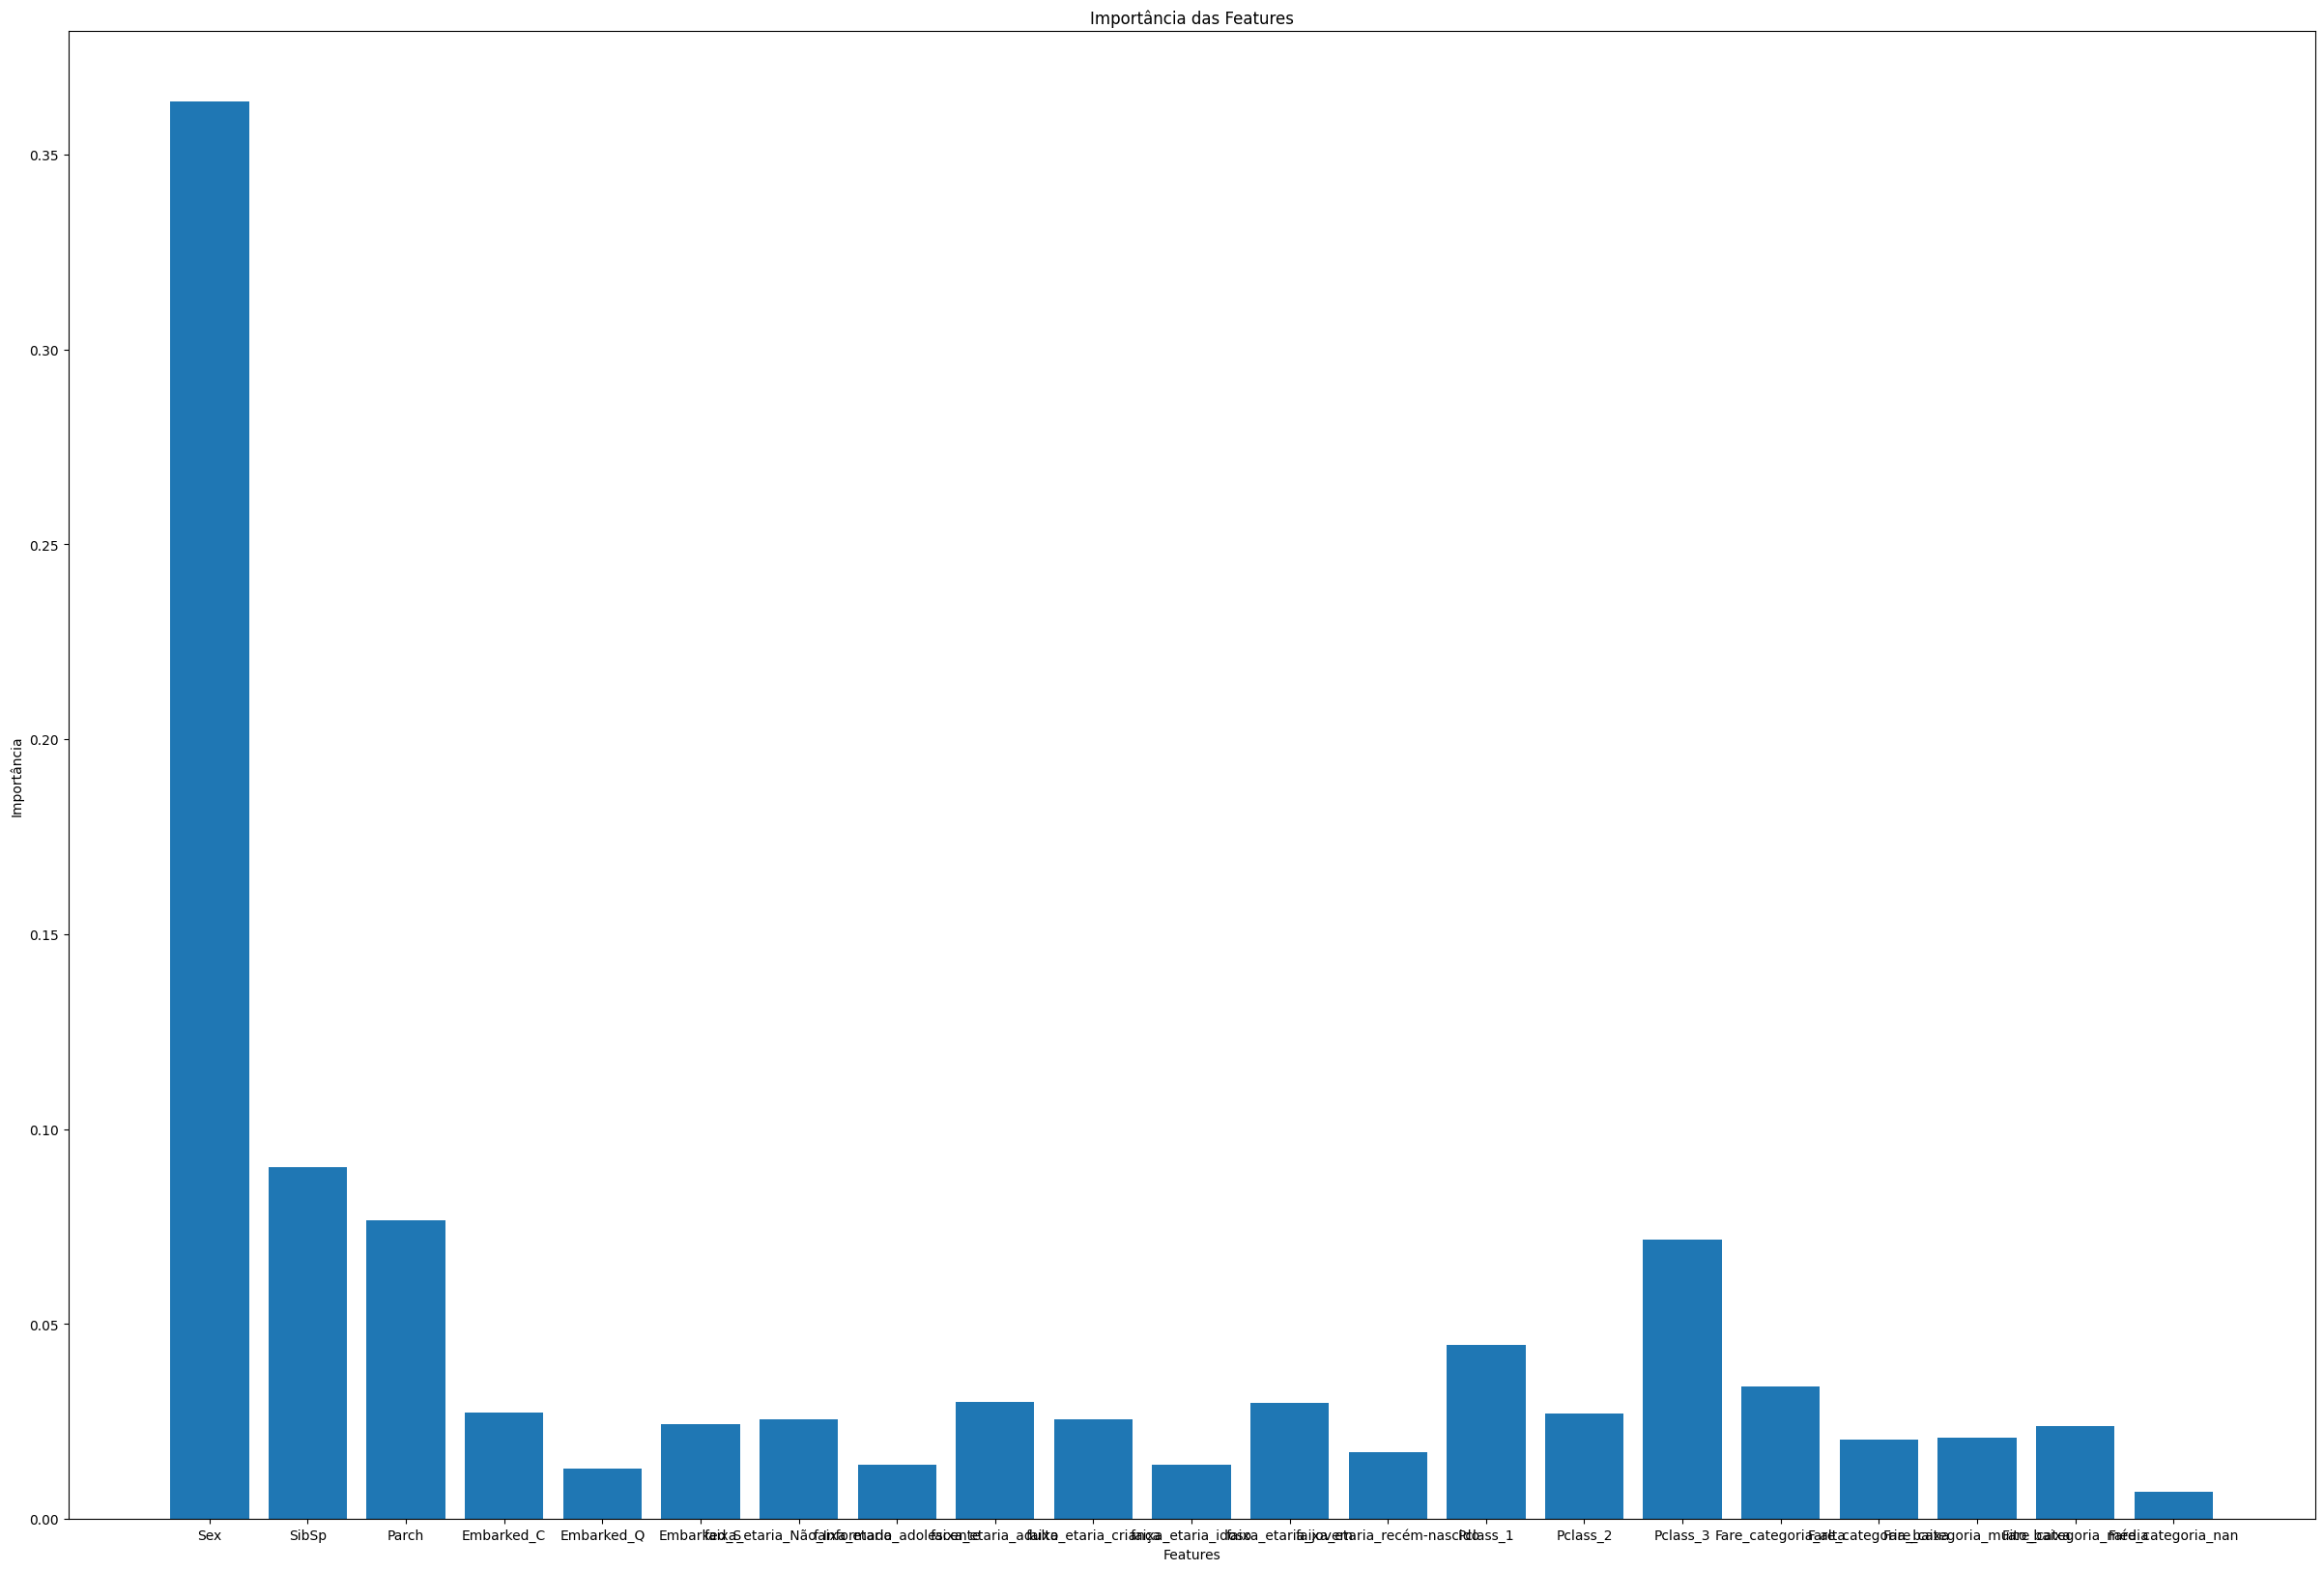

In [33]:
# Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_without_target, y)

# Obter importâncias
importancias = modelo.feature_importances_
nomes_features = X_without_target.columns

# Visualizar
plt.figure(figsize=(30, 20))
plt.bar(nomes_features, importancias)
plt.title('Importância das Features')
plt.ylabel('Importância')
plt.xlabel('Features')
plt.show()


In [34]:
X_without_target['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [35]:
X_without_target['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [36]:
X_without_target

,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,faixa_etaria_Não_Informado,faixa_etaria_adolescente,faixa_etaria_adulto,faixa_etaria_criança,...,faixa_etaria_jovem,faixa_etaria_recém-nascido,Pclass_1,Pclass_2,Pclass_3,Fare_categoria_alta,Fare_categoria_baixa,Fare_categoria_muito_baixa,Fare_categoria_média,Fare_categoria_nan
0,1.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
887,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,1,2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
